In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sale_price = pd.read_csv('submission.csv')

In [3]:
train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')
sale_price = pd.read_csv('submission.csv', index_col='Id')
test = test.join(sale_price)
df = pd.concat([train, test])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84062.0
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,80911.0
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,166224.0


## Dataset variables

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

## Graphical analysis

### Correlation matrix

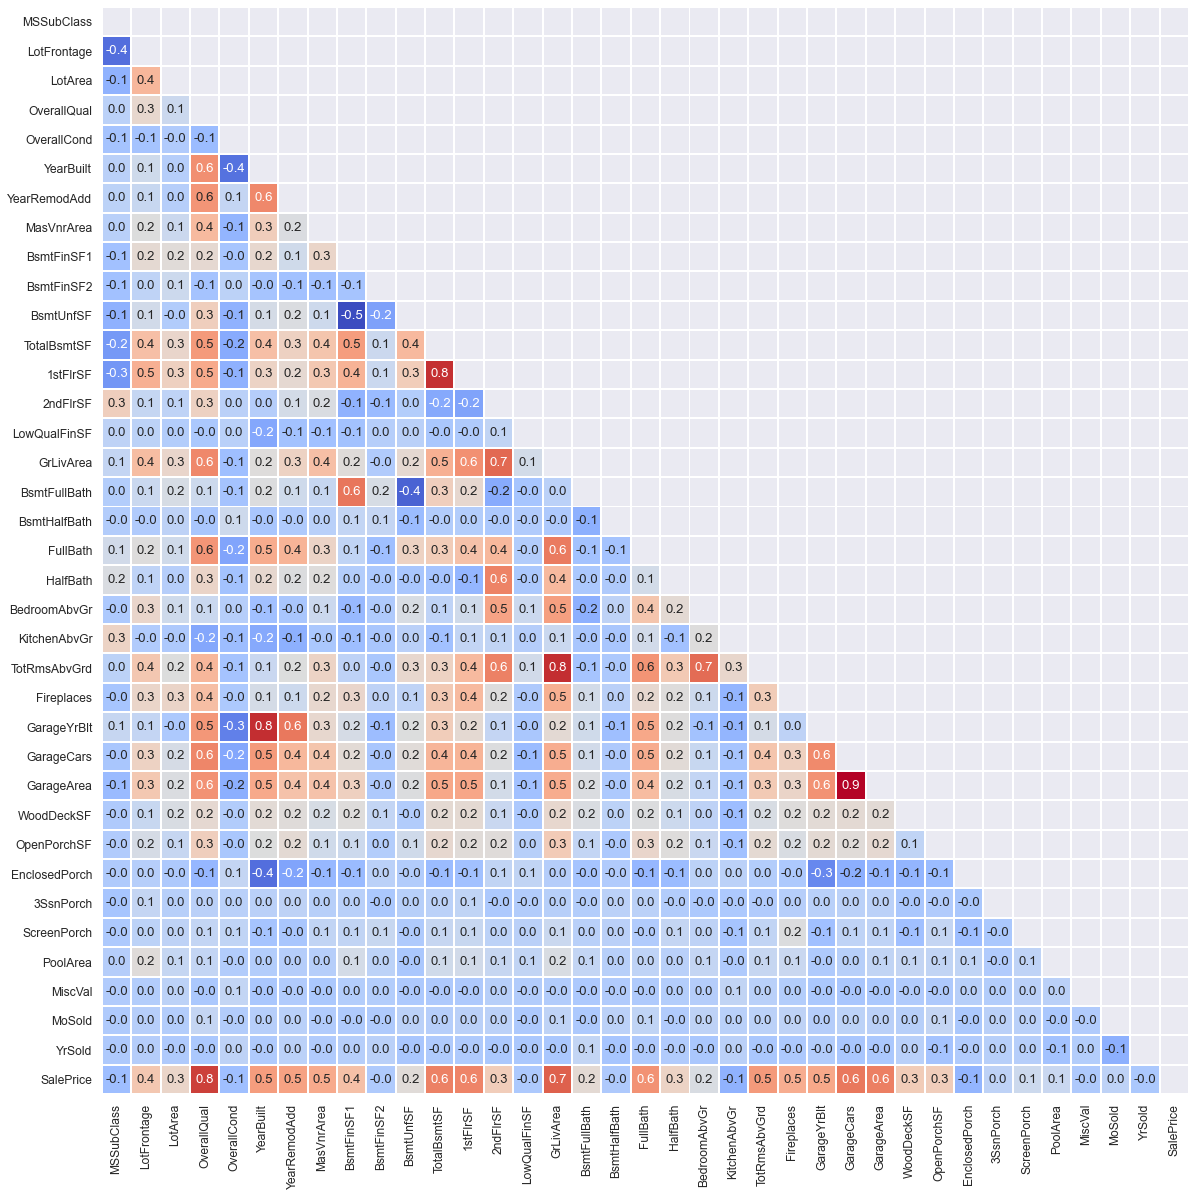

In [201]:
sns.set(font_scale=1.1)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

Summary:

- There's strong relation between overall quality of the houses and their sale prices.

- Grade living area seems strong indicator for sale price.

- Garage features, number of baths and rooms, how old the building is etc. also having effect on the price on various levels too.

- Overall condition of the house seems less important on the pricing

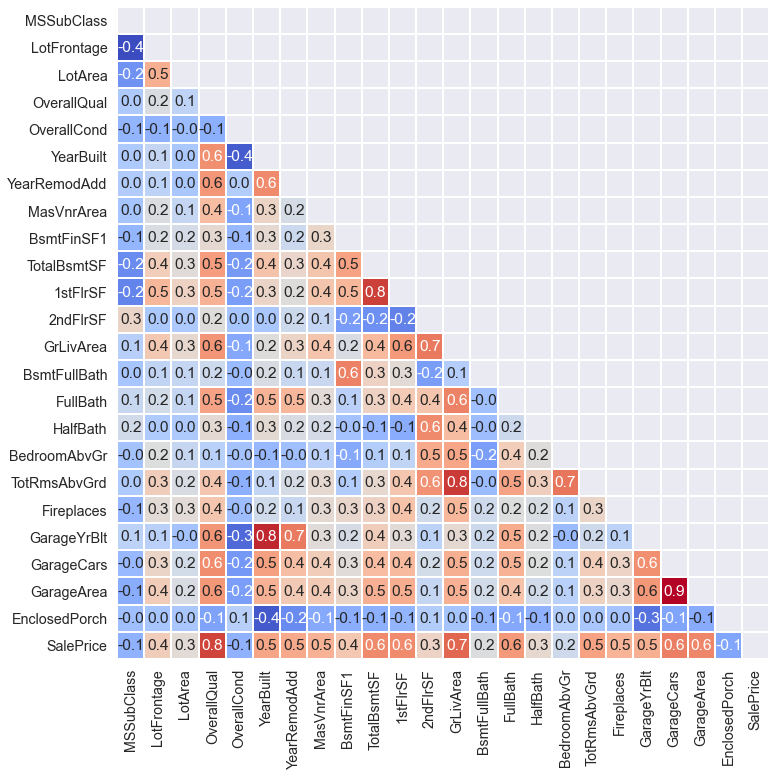

In [202]:
df_corr = df.drop(['3SsnPorch', 'OpenPorchSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'WoodDeckSF', 'BsmtUnfSF', 'BsmtHalfBath', 'BsmtFinSF2', 'KitchenAbvGr', 'LowQualFinSF'], axis=1)
sns.set(font_scale=1.3)
correlation = df_corr.corr()
mask = np.triu(correlation.corr())
plt.figure(figsize=(12, 12))
sns.heatmap(correlation,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

## Some histograms and regplots

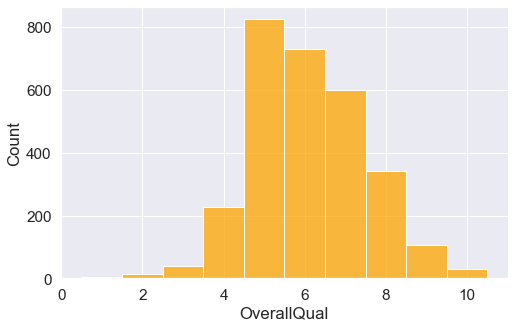

In [203]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set(font_scale=1.4)
sns.histplot(x='OverallQual', data=df, color='orange', binwidth=1, discrete=True);

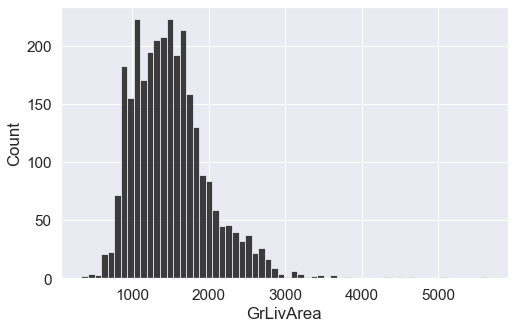

In [204]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set(font_scale=1.4)
sns.histplot(x='GrLivArea', data=df, color='black');

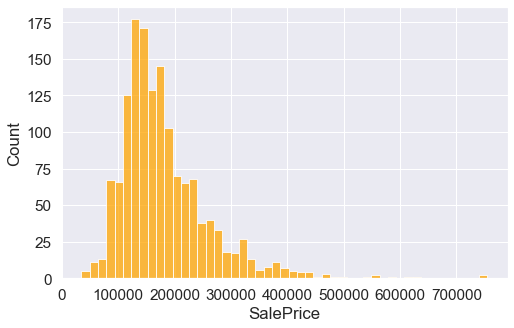

In [205]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set(font_scale=1.4)
sns.histplot(x='SalePrice', data=df, color='orange');

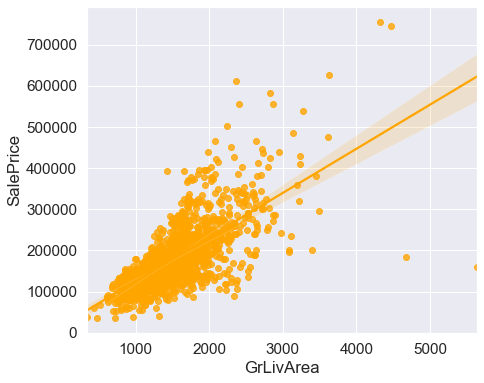

In [206]:
sns.set(rc={'figure.figsize':(7,6)})
sns.set(font_scale=1.4)
sns.regplot(y='SalePrice', x='GrLivArea', data=df, color='orange');

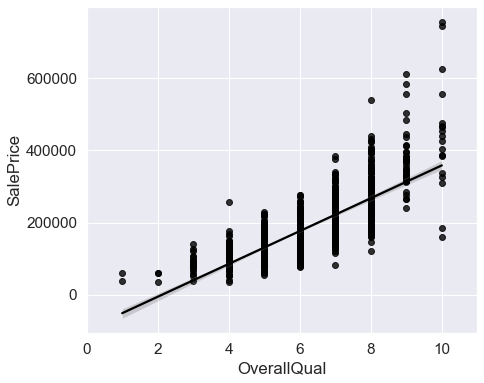

In [207]:
sns.set(rc={'figure.figsize':(7,6)})
sns.set(font_scale=1.4)
plt.xlim([0, 11])
sns.regplot(y='SalePrice', x='OverallQual', data=df, color='black');

In [208]:
set(df['YrSold'])

{2006, 2007, 2008, 2009, 2010}

## Data preparing

Joining datasets with train and test

In [209]:
train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')
sale_price = pd.read_csv('submission.csv', index_col='Id')
test = test.join(sale_price)
df = pd.concat([train, test])
df

,MSSubClass,MSZoning,LotFrontage,...,SaleType,SaleCondition,SalePrice
Id,,,,,,,
1,60,RL,65.0,...,WD,Normal,208500.0
2,20,RL,80.0,...,WD,Normal,181500.0
...,...,...,...,...,...,...,...
2918,85,RL,62.0,...,WD,Normal,120374.0
2919,60,RL,74.0,...,WD,Normal,213793.0


Lets look at the column values types

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

Some columns don't make sense because of missings, we will drop them

In [211]:
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

Displaying all columns with object type

In [212]:
df.select_dtypes(include=[object])

,MSZoning,Street,LotShape,...,PavedDrive,SaleType,SaleCondition
Id,,,,,,,
1,RL,Pave,Reg,...,Y,WD,Normal
2,RL,Pave,Reg,...,Y,WD,Normal
...,...,...,...,...,...,...,...
2918,RL,Pave,Reg,...,Y,WD,Normal
2919,RL,Pave,Reg,...,Y,WD,Normal


Encoding categorical features using one-hot-encoding. All Nans are ignored

In [213]:
df = pd.get_dummies(df, drop_first=True)
df.describe()

,MSSubClass,LotFrontage,LotArea,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2433.000000,2919.00000,...,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.11408,...,0.015759,0.822885,0.083933
...,...,...,...,...,...,...,...
75%,70.000000,80.000000,11570.00000,...,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.00000,...,1.000000,1.000000,1.000000


In [214]:
df.isnull().sum()

MSSubClass                 0
LotFrontage              486
                        ... 
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 233, dtype: int64

Filling NaNs with mean. Actually here NaNs take less than 10%. We can use median, mean, it will not have a strong impact on the results

In [215]:
for name in df.select_dtypes("number"):
    df[name].fillna((df[name].mean()), inplace=True)

We should take logs or to norm the list of these variables: we have picked them up by analysing descriptive statistics above

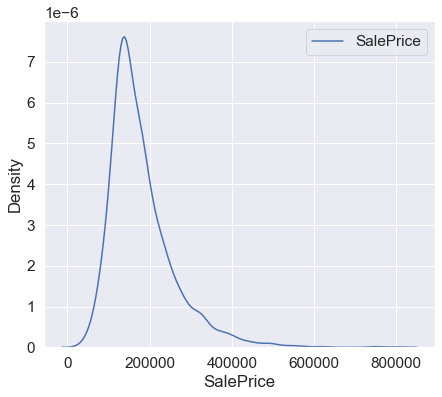

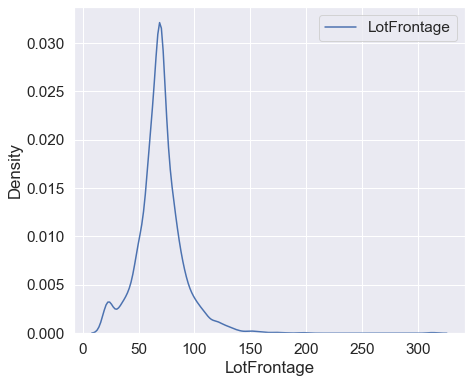

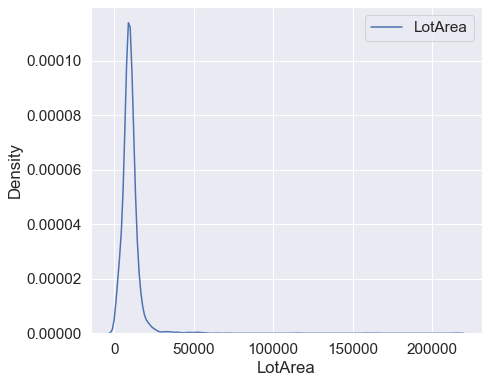

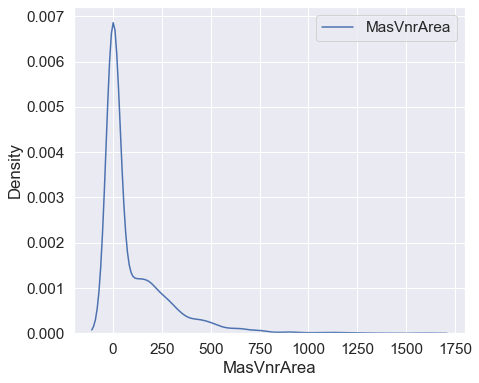

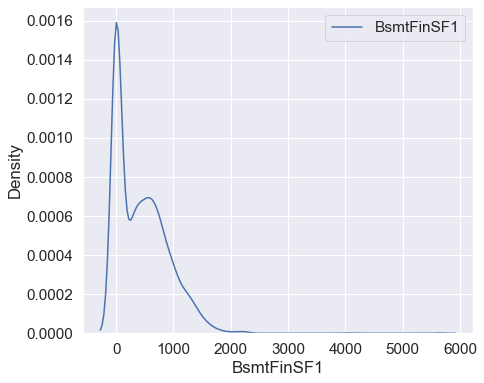

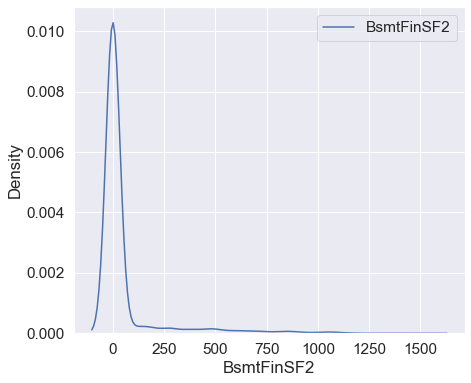

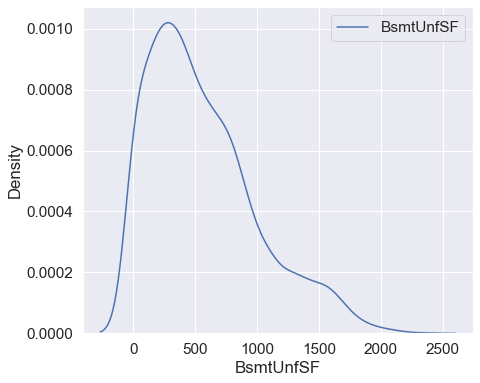

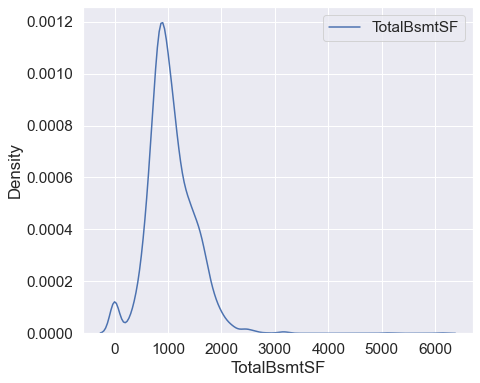

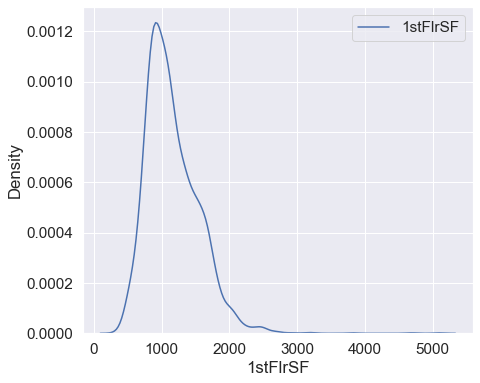

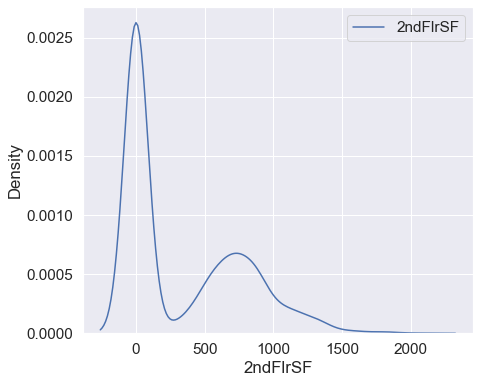

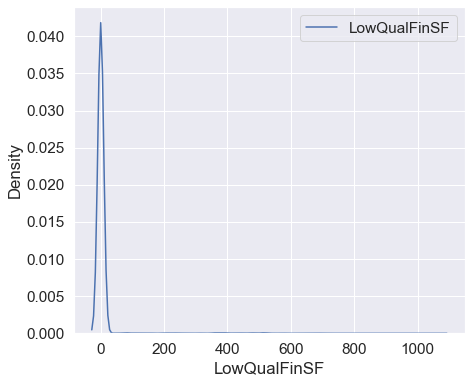

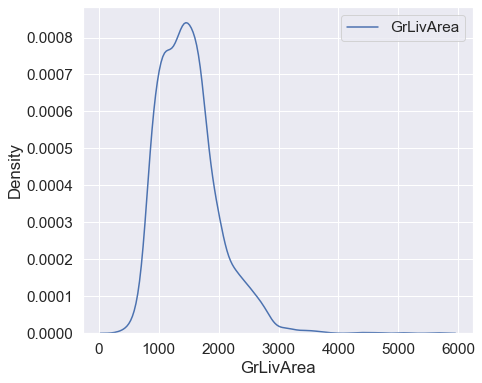

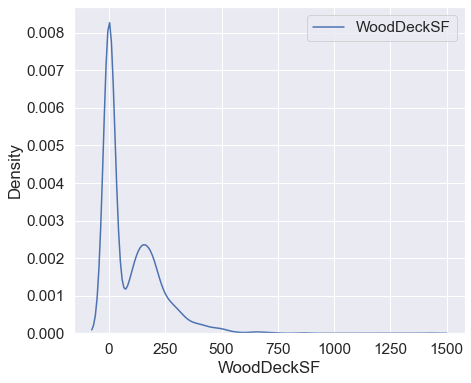

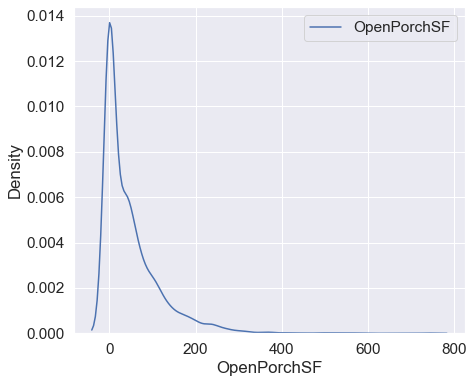

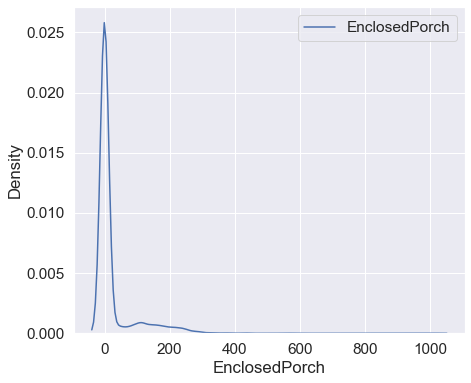

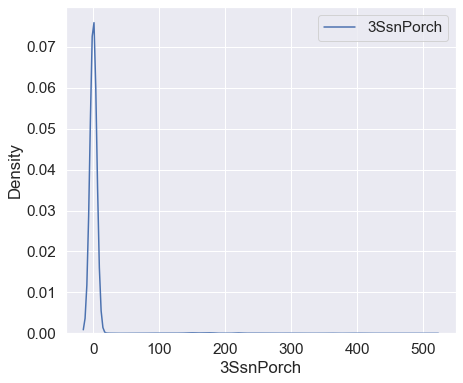

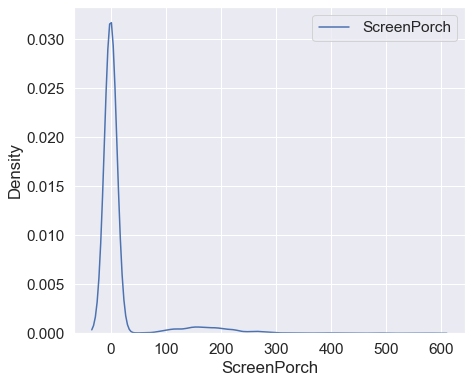

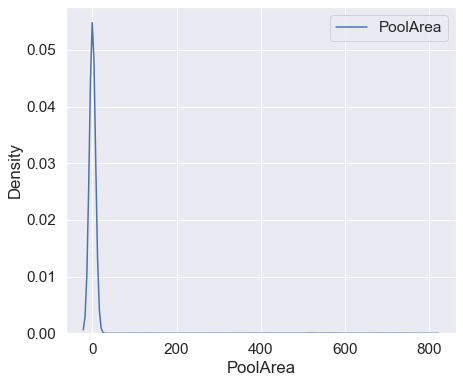

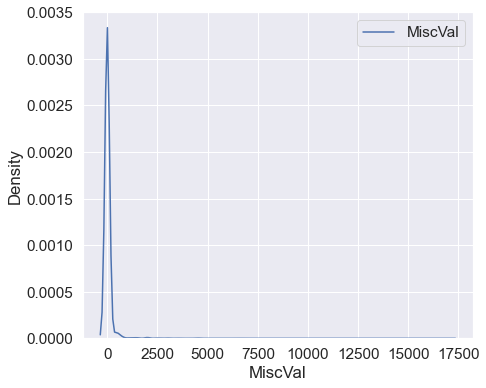

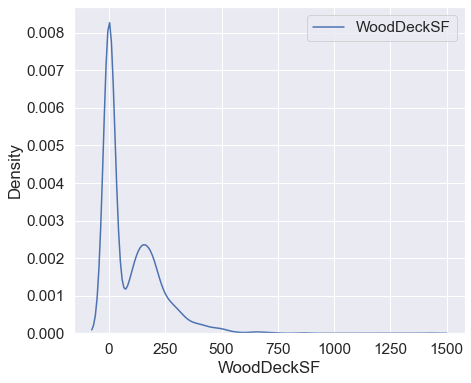

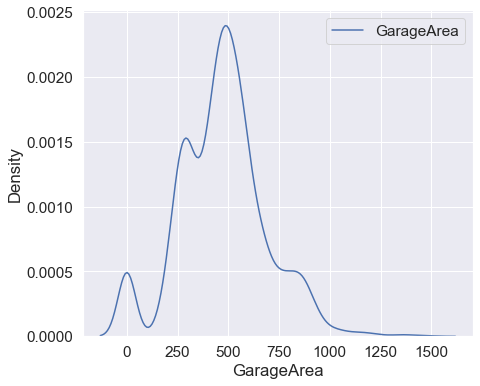

In [216]:
density = ['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'WoodDeckSF', 'GarageArea']
for i in density:
    sns.kdeplot(x=i, data=df, label=i)
    plt.legend()
    plt.show()

Let's create a new feature for the list of the variables above indicating the absence of this characteristics in the house:

In [217]:
m = 0
for i in ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'WoodDeckSF', 'GarageArea']:
    df[i+'_dummy'] = df[i]
    df[i+'_dummy'].loc[df[i+'_dummy']>0] = 1
    m +=1
print(m)

15


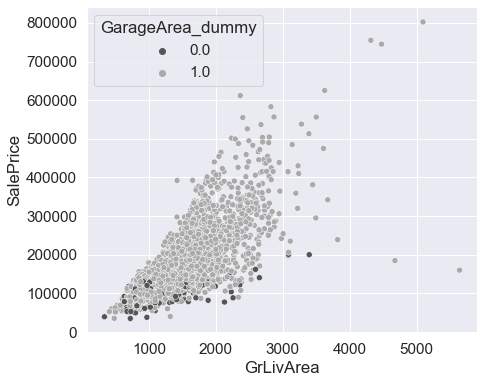

In [232]:
sns.set(rc={'figure.figsize':(7,6)})
sns.set(font_scale=1.4)
sns.scatterplot(y='SalePrice', x='GrLivArea', data=df, hue='GarageArea_dummy', palette='gray');

In [233]:
df['GarageArea_dummy'].sum()/df.shape[0]

0.946214457005824

### Part 1 - price prediction

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X = df.drop(columns='SalePrice')
X

,MSSubClass,LotFrontage,LotArea,...,PoolArea_dummy,MiscVal_dummy,GarageArea_dummy
Id,,,,,,,
1,60,65.0,8450,...,0,0,1.0
2,20,80.0,9600,...,0,0,1.0
...,...,...,...,...,...,...,...
2918,85,62.0,10441,...,0,1,0.0
2919,60,74.0,9627,...,0,0,1.0


In [236]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

col_names = list(X.columns[:36])
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), col_names)
])

X[col_names] = column_transformer.fit_transform(X)

In [237]:
list(X.columns[:36])

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [248]:
Y = df['SalePrice']

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3, random_state=1)

In [250]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV

In [251]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [252]:
from sklearn.metrics import mean_squared_error, r2_score

In [253]:
lr = LinearRegression()

In [254]:
lr.fit(X_train,y_train)

LinearRegression()

In [255]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print("MSE train score = {}".format(mean_squared_error(y_train, pred_train)))
print("MSE test score = {}".format(mean_squared_error(y_test, pred_test)))

MSE train score = 301662909.1112475
MSE test score = 2.0511744286786637e+24


In [256]:
print("R2 train score = {}".format(r2_score(y_train, pred_train)))
print("R2 test score = {}".format(r2_score(y_test, pred_test)))

R2 train score = 0.9533746269768887
R2 test score = -355908159378187.3


implemention of simple linear regression resulted in overfitting problem. 

Lets see if we can improve the quality by introducing regularization:

In [257]:
@ignore_warnings(category=ConvergenceWarning)
def funcRidge():
    alphas = np.logspace(-2, 3, 50)
    searcherRidge = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring='neg_mean_squared_error', cv=5)
    searcherRidge.fit(X_train, y_train)

    best_alpha = searcherRidge.best_params_["alpha"]
    print("Best alpha = %.4f" % best_alpha)
    return searcherRidge

searcherRidge = funcRidge()


Best alpha = 14.5635


In [32]:
@ignore_warnings(category=ConvergenceWarning)
def funcLasso():
    alphas = np.logspace(-2, 3, 50)
    searcherLasso = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring='neg_mean_squared_error', cv=5)
    searcherLasso.fit(X_train, y_train)

    best_alpha = searcherLasso.best_params_["alpha"]
    print("Best alpha = %.4f" % best_alpha)
    return searcherLasso
    
searcherLasso = funcLasso()

Best alpha = 75.4312


In [24]:
@ignore_warnings(category=ConvergenceWarning)
def funcElasticNet():
    alphas = np.linspace(0.005, 5, 10)
    searcherElasticNet = GridSearchCV(ElasticNet(), [{"alpha": alphas, "l1_ratio": alphas}], scoring='neg_mean_squared_error', cv=5)
    searcherElasticNet.fit(X_train, y_train)

    best_alpha = searcherElasticNet.best_params_["alpha"]
    best_l1 = searcherElasticNet.best_params_["l1_ratio"]
    print("Best alpha = %.4f" % best_alpha)
    print("Best l1_ratio = %.4f" % best_l1)
    return searcherElasticNet

searcherElasticNet = funcElasticNet()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:256: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regre

Best alpha = 0.0050
Best l1_ratio = 0.0050


In [258]:
from sklearn.metrics import mean_squared_error

In [259]:
reg = Ridge(alpha=14.5635)
reg.fit(X_train, y_train)

Ridge(alpha=14.5635)

In [260]:
print('R^2 train score = %.4f' % reg.score(X_train, y_train))

R^2 train score = 0.9243


In [261]:
print('R^2 test score = %.4f' % reg.score(X_test, y_test))

R^2 test score = 0.9354


In [57]:
print('MSE train score = %.4f' % mean_squared_error(y_train, reg.predict(X_train)))

MSE train score = 489843297.0472


In [58]:
print('MSE test score = %.4f' %mean_squared_error(y_test, reg.predict(X_test)))

MSE test score = 372308586.8883


In [59]:
reg = Lasso(alpha=75.4312)
reg.fit(X_train, y_train)

Lasso(alpha=75.4312)

In [60]:
print('R^2 train score = %.4f' % reg.score(X_train, y_train))

R^2 train score = 0.9264


In [61]:
print('R^2 test score = %.4f' % reg.score(X_test, y_test))

R^2 test score = 0.9330


In [62]:
print('MSE train score = %.4f' % mean_squared_error(y_train, reg.predict(X_train)))

MSE train score = 476282309.0072


In [63]:
print('MSE test score = %.4f' %mean_squared_error(y_test, reg.predict(X_test)))

MSE test score = 386248319.4714


In [64]:
reg = ElasticNet(alpha=0.0050, l1_ratio=0.0050)
reg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536079881659.2986, tolerance: 1321806740.310242
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.005, l1_ratio=0.005)

In [65]:
print('R^2 train score = %.4f' % reg.score(X_train, y_train))

R^2 train score = 0.9262


In [66]:
print('R^2 test score = %.4f' % reg.score(X_test, y_test))

R^2 test score = 0.9346


In [67]:
print('MSE train score = %.4f' % mean_squared_error(y_train, reg.predict(X_train)))

MSE train score = 477618572.8147


In [68]:
print('MSE test score = %.4f' %mean_squared_error(y_test, reg.predict(X_test)))

MSE test score = 376678329.0991


In [30]:
#среднее MSE для каждого альфа по кроссвалидации
searcherRidge.cv_results_['mean_test_score']

array([-1.11622837e+09, -1.09758698e+09, -1.07616374e+09, -1.05206749e+09,
       -1.02564309e+09, -9.97506376e+08, -9.68537766e+08, -9.39818127e+08,
       -9.12504664e+08, -8.87666669e+08, -8.66121540e+08, -8.48318152e+08,
       -8.34300730e+08, -8.23757279e+08, -8.16127820e+08, -8.10733339e+08,
       -8.06890229e+08, -8.03990363e+08, -8.01543462e+08, -7.99189279e+08,
       -7.96690904e+08, -7.93919219e+08, -7.90835028e+08, -7.87471980e+08,
       -7.83921087e+08, -7.80316689e+08, -7.76823665e+08, -7.73625850e+08,
       -7.70915639e+08, -7.68884491e+08, -7.67713828e+08, -7.67565906e+08,
       -7.68574926e+08, -7.70839559e+08, -7.74418738e+08, -7.79332359e+08,
       -7.85567364e+08, -7.93088267e+08, -8.01850406e+08, -8.11814674e+08,
       -8.22963595e+08, -8.35319151e+08, -8.48961943e+08, -8.64049574e+08,
       -8.80831287e+08, -8.99657456e+08, -9.20986853e+08, -9.45400303e+08,
       -9.73633507e+08, -1.00664198e+09])

In [33]:
searcherLasso.cv_results_['mean_test_score']

array([-1.19832093e+09, -1.19799427e+09, -1.19758108e+09, -1.19705893e+09,
       -1.19639881e+09, -1.19556477e+09, -1.19451100e+09, -1.19318007e+09,
       -1.19168137e+09, -1.19116883e+09, -1.19052222e+09, -1.18970814e+09,
       -1.18868202e+09, -1.18737730e+09, -1.18578688e+09, -1.18379825e+09,
       -1.18131971e+09, -1.17825909e+09, -1.17454088e+09, -1.16989312e+09,
       -1.16405733e+09, -1.15663927e+09, -1.14740797e+09, -1.13579791e+09,
       -1.12141599e+09, -1.10361109e+09, -1.08181067e+09, -1.05554942e+09,
       -1.02434437e+09, -9.88827754e+08, -9.47407014e+08, -9.02685464e+08,
       -8.57137414e+08, -8.13991454e+08, -7.80267936e+08, -7.66661818e+08,
       -7.62462943e+08, -7.57444962e+08, -7.55356187e+08, -7.56717178e+08,
       -7.61341804e+08, -7.68831571e+08, -7.73575451e+08, -7.81988096e+08,
       -7.98076986e+08, -8.19754744e+08, -8.49952832e+08, -8.84659536e+08,
       -9.18988320e+08, -9.59523866e+08])

In [34]:
searcherElasticNet.cv_results_['mean_test_score']

array([-7.69764887e+008, -7.80155212e+008, -6.47210200e+009,
       -6.47210200e+009, -6.47210200e+009, -6.47210200e+009,
       -6.47210200e+009, -6.47210200e+009, -6.47210200e+009,
       -6.47210200e+009, -9.92869705e+008, -9.02302439e+008,
       -6.47210200e+009, -6.47210200e+009, -6.47210200e+009,
       -6.47210200e+009, -6.47210200e+009, -6.47210200e+009,
       -6.47210200e+009, -6.47210200e+009, -1.12154796e+009,
       -9.75549918e+008, -6.47210200e+009, -6.47210200e+009,
       -6.47210200e+009, -6.47210200e+009, -6.47210200e+009,
       -6.47210200e+009, -6.47210200e+009, -6.47210200e+009,
       -1.24044448e+009, -1.03658430e+009, -6.47210200e+009,
       -6.47210200e+009, -6.47210200e+009, -6.47210200e+009,
       -6.47210200e+009, -6.47210200e+009, -6.47210200e+009,
                   -inf, -1.35713276e+009, -1.09272327e+009,
       -6.47210200e+009, -6.47210200e+009, -6.47210200e+009,
       -6.47210200e+009, -6.47210200e+009,             -inf,
                   -inf,

In [262]:
from sklearn.model_selection import cross_val_score

In [263]:
X_for_cv_score = pd.concat([X_train, X_test])
y_for_cv_score= pd.concat([y_train, y_test])

In [70]:
cross_val_score(Ridge(alpha=14.5635), X_for_cv_score, y_for_cv_score, scoring='r2', cv=5).mean()

0.9126046649819581

In [71]:
cross_val_score(Lasso(alpha=75.4312), X_for_cv_score, y_for_cv_score,scoring='r2', cv=5).mean()

0.9131876995287753

In [51]:
cross_val_score(ElasticNet(alpha=0.0050, l1_ratio=0.0050), X_for_cv_score, y_for_cv_score,scoring='r2', cv=5).mean()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 525602332589.3064, tolerance: 1402176141.4656796
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 599307016460.8566, tolerance: 1481290979.3398933
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415906283852.7229, tolerance: 1435797852.665021
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarn

0.9126726681205295

In [264]:
y_rid_pred = searcherRidge.predict(X)

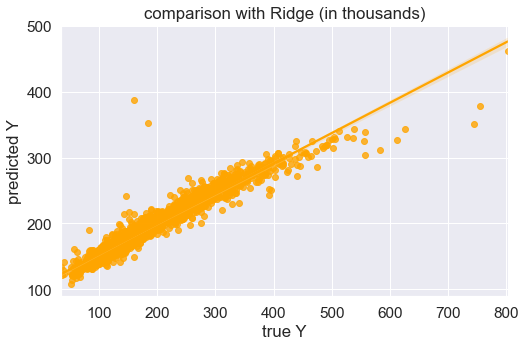

In [287]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set(font_scale=1.4)
ax = sns.regplot(x=Y, y=y_rid_pred, color='orange')
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(y) for y in ax.get_xticks()/1000]
ax.set_yticklabels(ylabels)
ax.set(title='comparison with Ridge (in thousands)', xlabel ='true Y', ylabel ='predicted Y');

In [281]:
y_las_pred = searcherLasso.predict(X)

[Text(0, 0.5, 'predicted Y'),
 Text(0.5, 0, 'true Y'),
 Text(0.5, 1.0, 'Comparison with Lasso (in thousands)')]

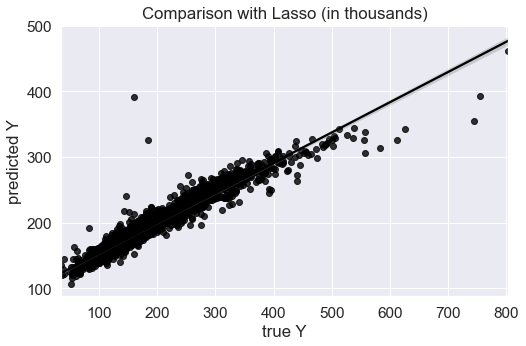

In [286]:
ix = sns.regplot(x=Y, y=y_las_pred, color='black')
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()/1000]
ix.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(y) for y in ax.get_xticks()/1000]
ix.set_yticklabels(ylabels)
ix.set(title='Comparison with Lasso (in thousands)', xlabel ='true Y', ylabel ='predicted Y')

### Part 2 - feature significance

Какие коэффициенты самые значимые? Попытка построить график зависимости коэффициентов от параметра регуляризации Лассо

In [55]:
X = df.drop(columns='SalePrice')
Y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3, random_state=1)

In [56]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,2ndFlrSF_dummy,LowQualFinSF_dummy,WoodDeckSF_dummy,OpenPorchSF_dummy,EnclosedPorch_dummy,3SsnPorch_dummy,ScreenPorch_dummy,PoolArea_dummy,MiscVal_dummy,GarageArea_dummy
Id,,,,,,,,,,,,,,,,,,,,,
654,50,60.0,10320,6,7,1906,1995,0.0,0.0,0.0,...,1,0,1,0,1,0,0,0,0,1.0
1896,50,45.0,8212,5,6,1941,1950,0.0,626.0,0.0,...,1,0,1,0,0,0,0,0,0,1.0
709,60,65.0,9018,7,5,2007,2007,0.0,0.0,0.0,...,1,0,1,1,0,0,0,0,0,1.0
1306,20,108.0,13173,9,5,2006,2007,300.0,1572.0,0.0,...,0,0,1,1,0,0,0,0,0,1.0
24,120,44.0,4224,5,7,1976,1976,0.0,840.0,0.0,...,0,0,1,1,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,20,86.0,11650,7,5,1959,1959,58.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,1.0
906,20,80.0,9920,5,5,1954,1954,110.0,354.0,290.0,...,0,0,0,0,1,0,0,0,0,1.0
1097,70,60.0,6882,6,7,1914,2006,0.0,0.0,0.0,...,1,0,1,0,1,0,0,0,0,0.0


In [57]:
mus = [mu for mu in np.arange(15,100,1)]

In [58]:
xcolumns = list(X_train.columns)

In [59]:
df_lasso = pd.DataFrame(columns= xcolumns)
df_lasso['index'] = mus

df_las = df_lasso.set_index('index')

In [60]:
for a in mus: 
    if a == 0:
        lasso = Lasso(alpha=0.00000001, max_iter=2000)
        lasso.fit(X_train,y_train)
    else:
        lasso = Lasso(alpha=a)
        lasso.fit(X_train, y_train)
    
    df_las.loc[a] = lasso.coef_
    print(a)
df_las 

15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,2ndFlrSF_dummy,LowQualFinSF_dummy,WoodDeckSF_dummy,OpenPorchSF_dummy,EnclosedPorch_dummy,3SsnPorch_dummy,ScreenPorch_dummy,PoolArea_dummy,MiscVal_dummy,GarageArea_dummy
index,,,,,,,,,,,,,,,,,,,,,
15,-98.0694,-36.5923,0.472225,7935.11,5230.22,208.069,88.9009,18.9511,29.0012,26.0279,...,-9077.22,-1168.33,-193.251,-857.679,-745.896,-0,808.568,-0,-2299.8,-0
16,-98.6804,-41.4375,0.469013,7996.27,5217.19,205.487,89.2231,19.1102,28.431,25.7462,...,-9192.8,-939.284,-225.765,-800.683,-791.709,-0,719.982,-0,-2398.65,-0
17,-99.2517,-46.2162,0.466145,8056.03,5204.44,202.87,89.467,19.262,27.8611,25.4353,...,-9308.43,-705.514,-261.063,-746.669,-835.603,-0,626.778,-0,-2494.39,-0
18,-101.163,-51.0475,0.463553,8119.43,5194.61,200.648,89.4791,19.4094,27.2395,25.0759,...,-9408.41,-425.082,-303.804,-692.498,-882.468,-0,527.776,-0,-2595.99,-0
19,-103.087,-55.8147,0.460023,8187.92,5182.45,198.1,89.7082,19.5338,26.7221,24.8009,...,-9499.43,-169.134,-333.48,-635.081,-941.196,-0,434.124,-0,-2686.77,-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-167.964,-105.451,0.438169,10376.3,5036.74,237.185,105.461,23.7687,20.3408,18.9952,...,-9110.33,-0,-305.554,0,-641.965,-0,0,-0,-2146.86,-0
96,-168.591,-105.304,0.438214,10390.5,5035.68,237.621,105.663,23.8031,20.3507,18.9325,...,-9081.08,-0,-296.012,0,-616.244,-0,0,-0,-2119.36,-0
97,-169.219,-105.157,0.438259,10404.7,5034.61,238.057,105.865,23.8374,20.3606,18.8697,...,-9051.84,-0,-286.47,0,-590.523,-0,0,-0,-2091.86,-0


In [61]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(18,8)})

In [62]:
df_l = df_las.astype('float')

Тут попытка построить график, убрали все выбросы (очень большие коэффициенты)

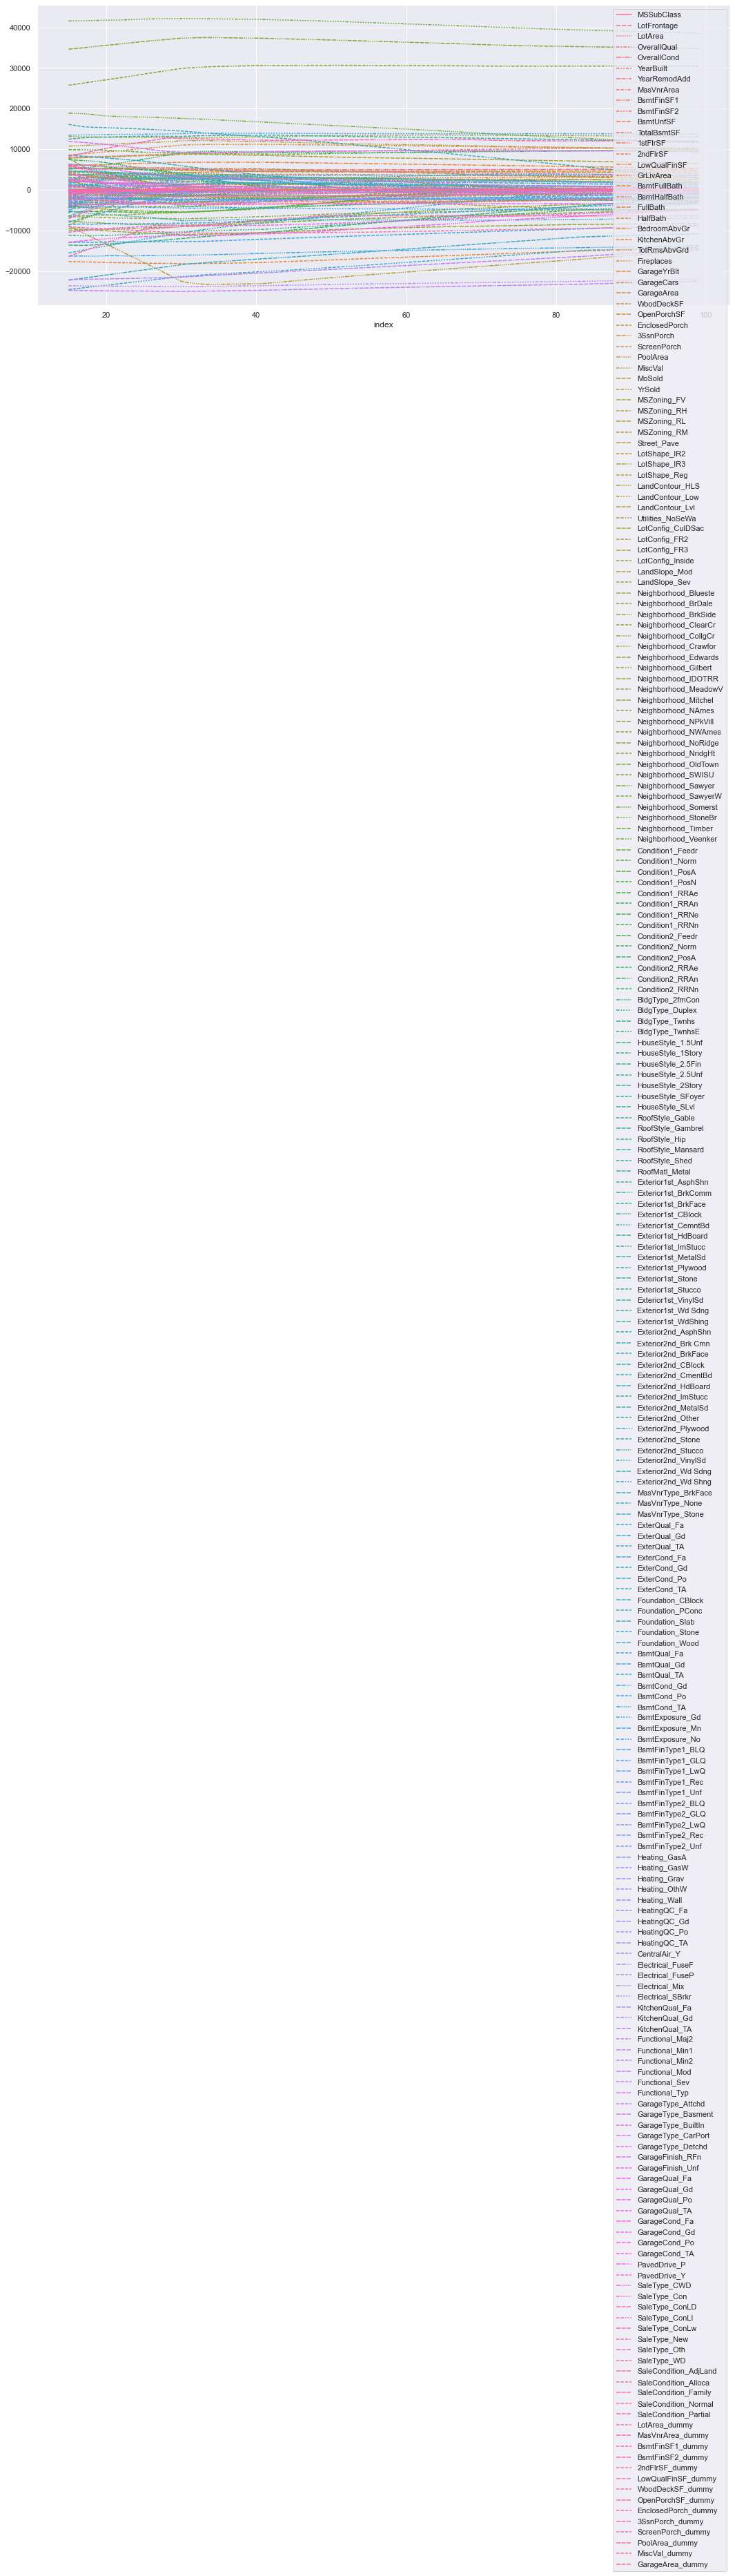

In [63]:
dropped_df = df_l.drop(['Condition2_PosN', 'RoofMatl_WdShngl', 'RoofMatl_Membran', 'RoofMatl_CompShg', 'RoofMatl_WdShake', 'RoofMatl_Tar&Grv', 'RoofMatl_Roll'], axis=1)
sns.lineplot(data = dropped_df)
plt.show()

In [64]:
pd.set_option('display.max_columns', None)
df_las

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotArea_dummy,MasVnrArea_dummy,BsmtFinSF1_dummy,BsmtFinSF2_dummy,2ndFlrSF_dummy,LowQualFinSF_dummy,WoodDeckSF_dummy,OpenPorchSF_dummy,EnclosedPorch_dummy,3SsnPorch_dummy,ScreenPorch_dummy,PoolArea_dummy,MiscVal_dummy,GarageArea_dummy
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

График неинформативен, очень много признаков. Оценим значимость просто по отсортированной таблице коэффициентами с кросс-валидированным параметром регуляризации

In [65]:
pd.set_option('display.max_rows', None)
df_las.loc[75][df_las.loc[75].abs().sort_values(ascending = False).index]

Condition2_PosN         -79856.8
RoofMatl_WdShngl         56185.4
Neighborhood_StoneBr     39833.6
Neighborhood_NoRidge     35500.8
Neighborhood_NridgHt     30443.3
KitchenQual_TA          -23445.7
KitchenQual_Gd          -22675.1
LotShape_IR3            -18142.8
KitchenQual_Fa          -17179.6
ExterQual_TA            -15924.6
KitchenAbvGr            -15546.7
BsmtQual_Gd             -14400.2
RoofMatl_CompShg         14255.9
BsmtExposure_Gd          13826.6
Neighborhood_Somerst     13462.8
Neighborhood_Crawfor     13406.7
ExterQual_Gd            -12623.5
Exterior1st_BrkFace      12569.3
SaleCondition_Partial    12104.4
LandContour_HLS          10657.4
GarageCars               10540.3
OverallQual              10055.9
BsmtQual_TA               -10017
2ndFlrSF_dummy           -9736.2
Functional_Typ           9635.16
Condition1_Norm          9584.71
BldgType_2fmCon          9453.92
Neighborhood_Edwards    -8756.75
Exterior2nd_Stucco      -7400.92
LandContour_Lvl          7342.69
Exterior2n

### Part 3 - classification

Модель классификации

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [67]:
df['Quality'] = np.where(df['OverallQual']>=7, 1, 0)

In [68]:
X = df.drop(['Quality', 'OverallQual'], axis=1)
Y = df['Quality']

In [69]:
X.shape

(2919, 246)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [71]:
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_columns', 5)

In [72]:
col_names = list(X.columns[:37])
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), col_names)
])

X[col_names] = column_transformer.fit_transform(X)
X[col_names] = column_transformer.transform(X)

In [73]:
Xn_train, Xn_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#### Логистическая регрессия

In [74]:
logit = LogisticRegression(solver='lbfgs', multi_class='auto', penalty = 'none')
logit.fit(X_train, y_train)

pred_train = logit.predict(X_train)
pred_test = logit.predict(X_test)
    
#доля правильных ответов; 
accuracy_score(y_train,pred_train), accuracy_score(y_test,pred_test)

(0.8898678414096917, 0.8915525114155252)

#### Логистисческая регрессия + L1

In [75]:
def Logit_l1():
    params = {'C': np.arange(0.5,0.7,0.01)}
    log_l1 = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), params, scoring='f1', cv=5)
    log_l1.fit(X_train, y_train)

    print('best score:', log_l1.best_score_)
    print('best params:', log_l1.best_params_)
    return log_l1

log_l1 = Logit_l1()

best score: 0.8603362798816054
best params: {'C': 0.6200000000000001}


#### Логистисческая регрессия + L2

In [76]:
def Logit_l2():
    
    params = {'C': np.arange(0.01,0.11,0.01)}
    log_l2 = GridSearchCV(LogisticRegression(penalty='l2'), params, scoring='f1', cv=5)
    log_l2.fit(X_train, y_train)

    print('best score:', log_l2.best_score_)
    print('best params:', log_l2.best_params_)
    return log_l2

log_l2 = Logit_l2()

best score: 0.8417144094274759
best params: {'C': 0.04}


#### Логистисческая регрессия + Elastic Net

In [77]:
def Logit_ElasticNet():
    
    params = {'C': np.arange(0.01,0.11,0.01), 'l1_ratio': np.linspace(0,1,10)}
    log_ElNet = GridSearchCV(LogisticRegression(penalty='elasticnet', solver='saga', random_state=1), params, scoring='f1', cv=5)
    log_ElNet.fit(X_train, y_train)

    print('best score:', log_ElNet.best_score_)
    print('best params:', log_ElNet.best_params_)
    return log_ElNet

log_ElNet = Logit_ElasticNet()

best score: 0.7618068070946105
best params: {'C': 0.01, 'l1_ratio': 0.0}


#### Метод опорных векторов

In [78]:
from sklearn.svm import SVC
def svm():
    
    params = {'C': np.arange(120,180,1)}
    svm = GridSearchCV(SVC(), params, scoring='f1', cv=5)
    svm.fit(X_train, y_train)

    print('best score:', svm.best_score_)
    print('best params:', svm.best_params_)
    return svm

svm = svm()

best score: 0.847573497571649
best params: {'C': 123}


#### Дерево

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import cv2
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier as KNC
from statistics import mean
import pydotplus
import pydot
import graphviz 
from io import StringIO
from IPython.display import display, Image

## training tree by crossvalidating tree depth 

In [95]:
#https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='f1'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
sm_tree_depths = range(1,30)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

In [96]:
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores

(array([0.81609866, 0.81682538, 0.83481522, 0.84081021, 0.84044239,
        0.83798243, 0.84686901, 0.83366531, 0.83215088, 0.83458109,
        0.82774671, 0.8285772 , 0.82287332, 0.81150004, 0.81275496,
        0.81479586, 0.81558385, 0.82144018, 0.82352723, 0.82037832,
        0.81790798, 0.80966712, 0.82166014, 0.82685431, 0.8163921 ,
        0.81808492, 0.82378849, 0.81440617, 0.81790005]),
 array([0.02668872, 0.02104753, 0.01653321, 0.01812215, 0.02951467,
        0.0210875 , 0.02328788, 0.02080025, 0.02120084, 0.02224373,
        0.0208915 , 0.02386712, 0.01751252, 0.019821  , 0.01695338,
        0.02636079, 0.0154924 , 0.01322075, 0.0194977 , 0.01206572,
        0.0205771 , 0.02398464, 0.02331705, 0.02087167, 0.02244794,
        0.0180518 , 0.01577463, 0.01827977, 0.0268871 ]),
 array([0.8722467 , 0.8825257 , 0.90063632, 0.91385218, 0.93343123,
        0.94664709, 0.9608419 , 0.96965247, 0.97503671, 0.98286833,
        0.98482624, 0.98727362, 0.989721  , 0.9916789 , 0.99510524,


In [97]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {} on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score,5), round(sm_best_tree_cv_score_std, 5)))

The depth-7 tree achieves the best mean cross-validation accuracy 0.84687 +/- 0.02329 on training dataset


Single tree depth:  7
accuracy, Training Set:  0.96084
accuracy, Test Set:  0.86758


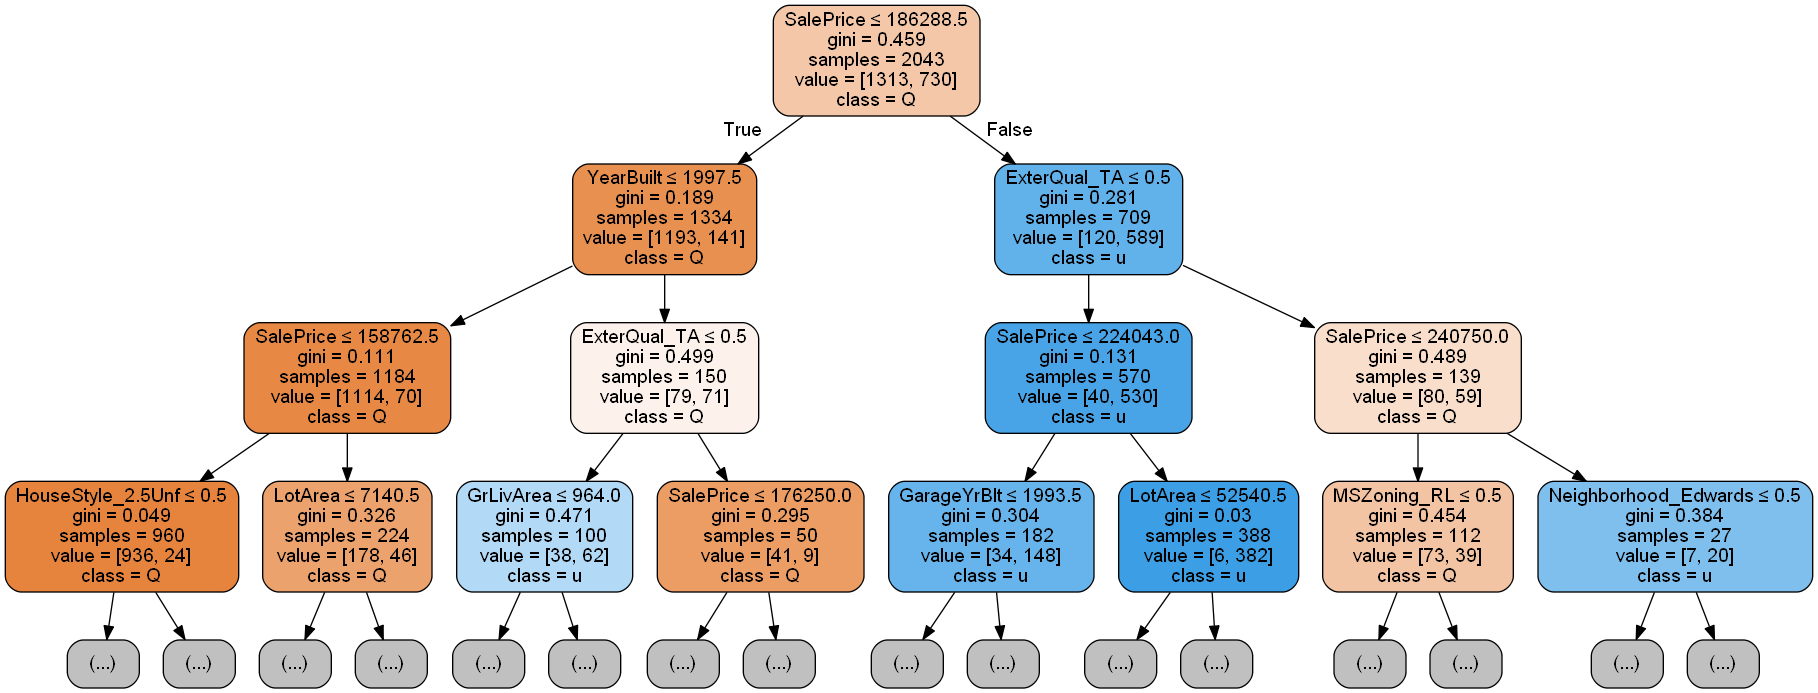

In [169]:
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('accuracy, Training Set: ', round(accuracy_train,5),)
    print('accuracy, Test Set: ', round(accuracy_test,5),)
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data, feature_names=list(X.columns), 
                                    class_names='Quality', 
                                    filled=True, 
                                    rounded=True,  
                                    special_characters=True, max_depth=3) 

    
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph[0].write_png("new.png")
    photo=display(Image(filename='new.png',width = 5000, height = 5000))
    
    
    return accuracy_train, accuracy_test, model
  

# train and evaluate a crossvalidated-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test, tree_with_depth= run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

In [170]:
a=tree_with_depth.feature_importances_
a=np.round(a,3)
# X.columns[np.argmax(a)]
ins=np.round((len((a[a<=0]))/len(X.columns))*100,3)
print(f'Model consider that {ins}% variables insignificant')
print(f' Feature {X.columns[np.argmax(a)]} is the most significant and plays role of {np.round(a[np.argmax(a)],2)*100}% ')

Model consider that 83.74% variables insignificant
 Feature SalePrice is the most significant and plays role of 65.0% 


In [171]:
np.array(X.columns)[a>0.08][1]

'ExterQual_TA'

In [172]:
a[a>0.08][1]

0.087

# trees with depth and neighbors by crossvalidation

Ideas for the code were taken from https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6

In [173]:
#finding hyperparametres as neighbours and depth of a tree

In [174]:
def run_cross_validation_on_trees_with_neighbours(X, y, tree_depths, neighbors, cv=5, scoring='f1'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for i in neighbors:
        cv_scores_list_for_depth = []
        cv_scores_std_for_depth = []
        cv_scores_mean_for_depth = []
        accuracy_scores_for_depth = []
        nbrs_clf = KNC(n_neighbors = i).fit(X, y)
        y = nbrs_clf.predict(X)
        for depth in tree_depths:
            tree_model = DecisionTreeClassifier(max_depth=depth)
            cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
            cv_scores_list_for_depth.append(cv_scores)
            cv_scores_mean_for_depth.append(cv_scores.mean())
            cv_scores_std_for_depth.append(cv_scores.std())
            accuracy_scores_for_depth.append(tree_model.fit(X, y).score(X, y))
        cv_scores_mean.append(np.array(cv_scores_mean_for_depth).mean())
        cv_scores_std.append(np.array(cv_scores_std_for_depth).std())
        accuracy_scores.append([min(np.array(accuracy_scores_for_depth)),np.median(np.array(accuracy_scores_for_depth)),(np.array(accuracy_scores_for_depth)).mean(),max(np.array(accuracy_scores_for_depth))])
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
sm_tree_depths = range(1,45)
sm_neighbors= range(1,10)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees_with_neighbours(X_train, y_train, sm_tree_depths, sm_neighbors)

In [175]:
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores

(array([0.82204822, 0.82979726, 0.83259145, 0.82986051, 0.84164044,
        0.84821922, 0.86437839, 0.87097934, 0.90189675]),
 array([0.00418018, 0.00415186, 0.00609111, 0.00410045, 0.00425963,
        0.00460579, 0.00592863, 0.00516208, 0.00444784]),
 array([[0.8722467 , 1.        , 0.98372491, 1.        ],
        [0.90455213, 1.        , 0.98956526, 1.        ],
        [0.90748899, 1.        , 0.98959863, 1.        ],
        [0.90944689, 1.        , 0.99008811, 1.        ],
        [0.91287323, 1.        , 0.99068883, 1.        ],
        [0.91874694, 1.        , 0.99113381, 1.        ],
        [0.92217327, 1.        , 0.99211276, 1.        ],
        [0.92511013, 1.        , 0.99221288, 1.        ],
        [0.93294175, 1.        , 0.99312508, 1.        ]]))

In [176]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
sm_best_neighbours = sm_neighbors[idx_max]
print('The depth-{}, neighbors-{} tree achieves the best mean cross-validation accuracy {} +/- {} on training dataset'.format(
      sm_best_tree_depth, sm_best_neighbours, round(sm_best_tree_cv_score,5), round(sm_best_tree_cv_score_std, 5)))

The depth-9, neighbors-9 tree achieves the best mean cross-validation accuracy 0.9019 +/- 0.00445 on training dataset


Single tree depth:  9
Single tree amount of neighbours:  9
accuracy, Training Set:  0.99657
accuracy, Test Set:  0.86872


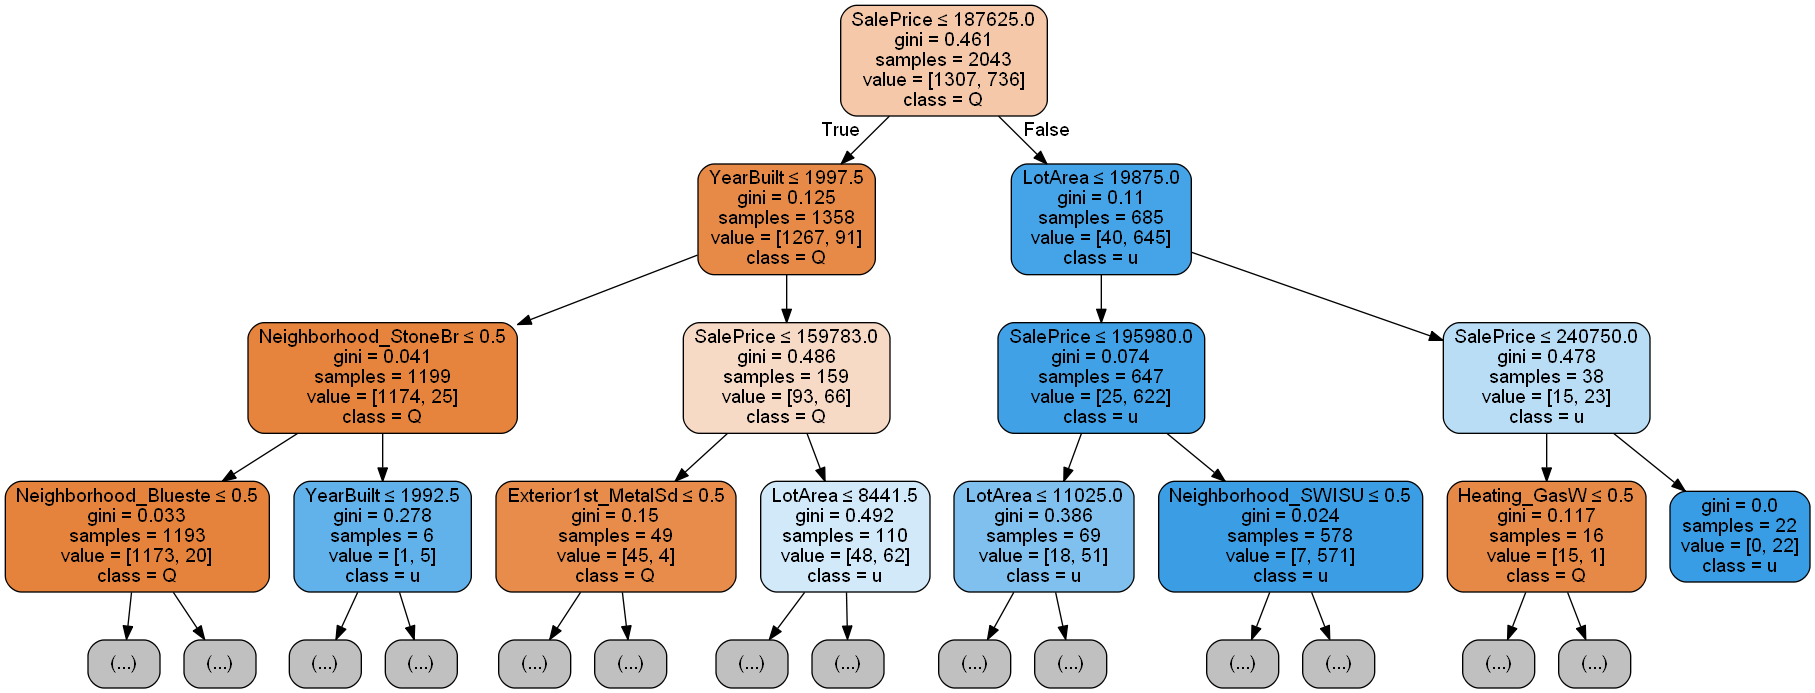

In [177]:
def run_single_tree_with_neighbours(X_train, y_train, X_test, y_test, depth, neighbors):
    nbrs_clf = KNC(n_neighbors = neighbors).fit(X_train, y_train)
    y_train = nbrs_clf.predict(X_train)
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Single tree amount of neighbours: ', neighbors)
    print('accuracy, Training Set: ', round(accuracy_train,5),)
    print('accuracy, Test Set: ', round(accuracy_test,5),)
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data, feature_names=list(X.columns), 
                                    class_names='Quality', 
                                    filled=True, 
                                    rounded=True,  
                                    special_characters=True,max_depth=3) 

    
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph[0].write_png("new2.png")
    photo=display(Image(filename='new2.png',width = 5000, height = 5000))
    
    return accuracy_train, accuracy_test, model
  

# train and evaluate a crossvalidated-depth and neighbours tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test, tree_with_depth_and_neighbours = run_single_tree_with_neighbours(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth,sm_best_neighbours)

In [178]:
a=tree_with_depth_and_neighbours.feature_importances_
a=np.round(a,3)
# X.columns[np.argmax(a)]
ins=np.round((len((a[a<=0]))/len(X.columns))*100,3)
print(f'Model consider that {ins}% variables insignificant')
print(f' Feature {X.columns[np.argmax(a)]} is the most significant and plays role of {np.round(a[np.argmax(a)],2)*100}% ')

Model consider that 90.244% variables insignificant
 Feature SalePrice is the most significant and plays role of 81.0% 


In [179]:
np.array(X.columns)[a>0.05]

array(['LotArea', 'SalePrice'], dtype=object)

In [180]:
a[a>0.05]

array([0.065, 0.81 ])

#### Метрики качества

In [181]:
# лучшие модели
logbest_l1 = log_l1.best_estimator_
logbest_l2 = log_l2.best_estimator_
logbest_ElNet = log_ElNet.best_estimator_
svm_best =svm.best_estimator_
#tree_with_depth
#tree_with_depth_and_neighbours

In [182]:
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 5)

In [183]:
# here roc_auc is wrong
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
metrics = [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]
models = [logit, logbest_l1, logbest_l2, logbest_ElNet, svm_best]
data = {}
l1,l2=[],[]
for model in models:
    model_name = str(model)
    data[model_name] = []
    for metric in metrics:
        current_metric = metric(y_test, model.predict(X_test))
        data[model_name].append(current_metric)
for metric in metrics:
        current_metric = metric(y_test, tree_with_depth_and_neighbours.predict(X_test))
        l1.append(current_metric)
        data['tree_with_depth_and_neighbours']=l1
for metric in metrics:
        current_metric = metric(y_test, tree_with_depth.predict(X_test))
        l2.append(current_metric)
        data['tree_with_depth']=l2
str_metrics = ['accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score']
pd.DataFrame(data, index=str_metrics)


,LogisticRegression(penalty='none'),"LogisticRegression(C=0.6200000000000001, penalty='l1', solver='liblinear')",LogisticRegression(C=0.04),"LogisticRegression(C=0.01, l1_ratio=0.0, penalty='elasticnet', random_state=1,\n solver='saga')",SVC(C=123),tree_with_depth_and_neighbours,tree_with_depth
accuracy_score,0.891553,0.880137,0.890411,0.820776,0.876712,0.868721,0.867580
precision_score,0.907348,0.874618,0.907051,0.802508,0.892857,0.857143,0.895270
recall_score,0.811429,0.817143,0.808571,0.731429,0.785714,0.805714,0.757143
f1_score,0.856712,0.844904,0.854985,0.765321,0.835866,0.830633,0.820433
roc_auc_score,0.878148,0.869598,0.876719,0.805828,0.861488,0.858180,0.849104


In [184]:
# calculating roc_auc separately
for model in models[0:4]:
    model_name = str(model)
    data[model_name] = []
    current_metric = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    data[model_name].append(current_metric)
data

{"LogisticRegression(penalty='none')": [0.9528191200434545],
 "LogisticRegression(C=0.6200000000000001, penalty='l1', solver='liblinear')": [0.9464584464964694],
 'LogisticRegression(C=0.04)': [0.9523954372623574],
 "LogisticRegression(C=0.01, l1_ratio=0.0, penalty='elasticnet', random_state=1,\n                   solver='saga')": [0.8788430200977729],
 'SVC(C=123)': [0.8767123287671232,
  0.8928571428571429,
  0.7857142857142857,
  0.8358662613981763,
  0.8614883215643672],
 'tree_with_depth_and_neighbours': [0.8687214611872146,
  0.8571428571428571,
  0.8057142857142857,
  0.8306332842415316,
  0.8581803367734926],
 'tree_with_depth': [0.867579908675799,
  0.8952702702702703,
  0.7571428571428571,
  0.8204334365325078,
  0.8491037479630635]}

In [193]:
print(roc_auc_score(y_test, tree_with_depth.predict_proba(X_test)[:,1]))
print(roc_auc_score(y_test, tree_with_depth_and_neighbours.predict(X_test)))

0.8870613796849539
0.8581803367734926


In [194]:
cross_val_score(logbest_l1, X_train, y_train, scoring='f1')

array([0.84615385, 0.87943262, 0.8707483 , 0.85517241, 0.84615385])

In [195]:
tree_with_depth_and_neighbours.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,

In [196]:
sns.set_theme(style="white")
sns.set(rc = {'figure.figsize':(8,5)})

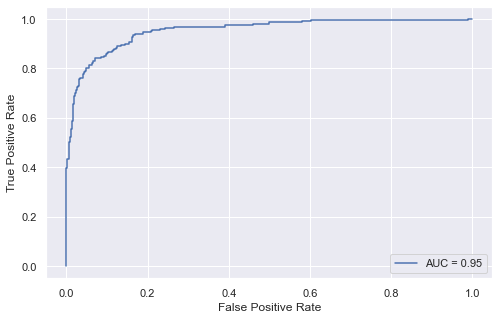

In [197]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()